In [1]:
import pandas as pd

# Load the features
features = pd.read_csv('final_features.csv')

# Quick preview
features.head()


,Year,scaled_total_tc_loss,scaled_tc_loss_lag1,scaled_Precipitation
0,2001,-0.855525,NaN,-1.009376
1,2002,-0.314673,-0.834485,-0.150171
2,2003,-0.197111,-0.305490,0.425903
3,2004,-0.021288,-0.190505,-0.799870
4,2005,0.241293,-0.018537,-1.301264


In [2]:
from sklearn.model_selection import train_test_split

# Features (scaled columns except Year)
X = features[['scaled_tc_loss_lag1', 'scaled_Precipitation']]

# Target variable
y = features['scaled_total_tc_loss']

# Drop NaN rows caused by lagging (first year)
X = X.dropna()
y = y[X.index]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 17
Testing samples: 5


Train Random Forest Regression Model.

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Random Forest Model Performance:
Mean Squared Error (MSE): 0.6591
R-squared (R²): -0.8554


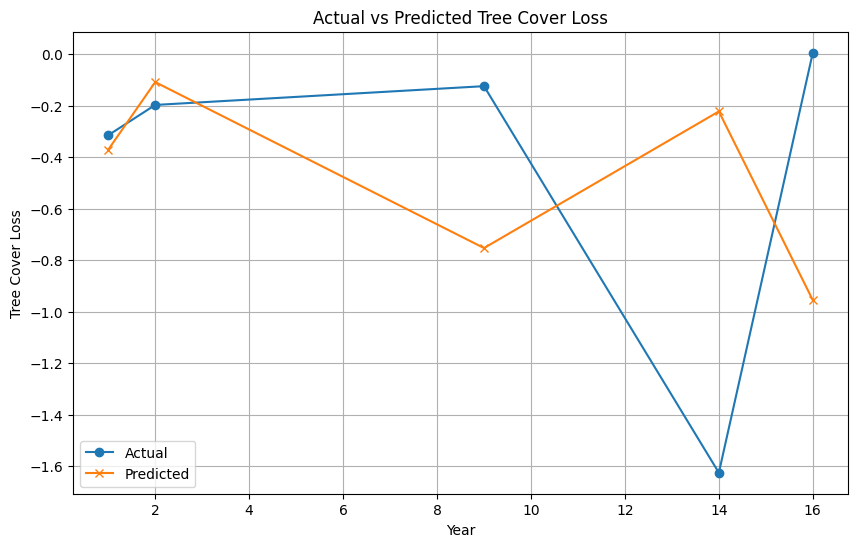

In [4]:
import matplotlib.pyplot as plt

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Year': X_test.index,
    'Actual_tc_loss': y_test.values,
    'Predicted_tc_loss': y_pred
})

# Sort by Year for better visualization
comparison_df = comparison_df.sort_values('Year')

# Plot
plt.figure(figsize=(10, 6))
plt.plot(comparison_df['Year'], comparison_df['Actual_tc_loss'], marker='o', label='Actual')
plt.plot(comparison_df['Year'], comparison_df['Predicted_tc_loss'], marker='x', label='Predicted')
plt.xlabel('Year')
plt.ylabel('Tree Cover Loss')
plt.title('Actual vs Predicted Tree Cover Loss')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
gb_predictions = gb_model.predict(X_test)

# Evaluate performance
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

print(f"Gradient Boosting Model Performance:")
print(f"Mean Squared Error (MSE): {gb_mse:.4f}")
print(f"R-squared (R²): {gb_r2:.4f}")


Gradient Boosting Model Performance:
Mean Squared Error (MSE): 0.8182
R-squared (R²): -1.3032
